<a href="https://colab.research.google.com/github/ahyen/ML-assignment/blob/master/Assingment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd ../content/drive/My Drive/Colab Notebooks/ML

/content/drive/My Drive/Colab Notebooks/ML


In [11]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split



review_data = load_files(r"movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=1500, min_df=3, max_df=0.8, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 1500)
(600, 1500)
(1400,)
(600,)


In [0]:
#set training parameter
# np.random.seed(40)
u = np.random.randn(300, 1500)
v = np.random.randn(60, 300)
w = np.random.randn(1, 60)

n = 300*1500 + 60*300 + 60
bias1 = np.random.randn(1)
bias2 = np.random.randn(1)
bias3 = np.random.randn(1)

In [0]:
def decision(h):
  if (h > 0.5):
      i = 1
  else: 
      i = 0
  return i

In [44]:
learning_rate = 0.3336666
lambda_ = 0.00001
cost_list = []
accuracy_list = []
test_cost_list = []
test_accuracy_list = []
y_pred_train = []
y_pred_test = []

for epoch in range(100):
  correct = 0
  correct_test = 0

  if epoch>50:
    learning_rate = 0.1
  elif epoch>80:
    learning_rate = 0.001

  for i in range(1400):
    x = X_train[i]

    # print(x.shape)
    #first hidden layer
    y_ = (np.dot(u, x)) + bias1
    y = 1/(1+np.exp(-y_))
    # print(y.shape)
    #second hidden layer
    z_ = (np.dot(v, y)) + bias2
    z = 1/(1+np.exp(-z_))
    # print(v.shape)
    # print(z.shape)
    #output layer
    h_ = (np.dot(w, z)) + bias3
    h = 1/(1+np.exp(-h_))
    # print(h.shape)
    # accuracy

    if (decision(h) == y_train[i]):
      correct += 1

    #cost
    cost =+ np.sum(- y_train[i] * np.log(h) - (1- y_train[i])*np.log(1 - h)) + (lambda_/2*n) * (np.sum(w*w) + np.sum(v*v) + np.sum(u*u))
    
    delta3 = (h - y_train[i]) * h * (1 - h)
    bias3 = bias3 - learning_rate * delta3
    # print("delta3 : ", delta3.shape)
    # print("z:", z.shape)
    # print(np.dot(w.T, delta3).shape)
    delta2 = np.dot(w.T, delta3) * z * (1 - z)
    bias2 = bias2 - learning_rate * delta2
    # print("delta2:", delta2.shape)
    # print("w.T:", w.T.shape)
    delta1 = np.dot(v.T, delta2) * y * (1 - y)
    bias1 = bias1 - learning_rate * delta1

    #Gradient descent
    w = w - learning_rate * (np.dot(delta3.reshape(1, 1), z.reshape(1, 60)) + (lambda_/60)*w)
    v = v - learning_rate * (np.dot(delta2.reshape(60, 1), y.reshape(1, 300)) + (lambda_/60*300)*v)
    u = u - learning_rate * (np.dot(delta1.reshape(300, 1), x.reshape(1, 1500)) + (lambda_/300*1500)*u)

  accuracy_list.append(correct/1400)
  print(epoch, ":", correct/1400)
  cost_list.append(cost/1400)
  
  for i in range(600):
    x_test = X_test[i]

    test_y_ = (np.dot(u, x_test)) + bias1
    test_y = 1/(1+np.exp(-test_y_))

    test_z_ = (np.dot(v, test_y)) + bias2
    test_z = 1/(1+np.exp(-test_z_))

    test_h_ = (np.dot(w, test_z)) + bias3
    test_h = 1/(1+np.exp(-test_h_))

    if (decision(test_h) == y_test[i]):
      correct_test += 1

    test_cost =+ np.sum(- y_test[i] * np.log(test_h) - (1- y_test[i])*np.log(1 - test_h)) +  (lambda_/2*n) * (np.sum(w*w) + np.sum(v*v) + np.sum(u*u))
  test_accuracy_list.append(correct_test/600)
  print("test:" , correct_test/600)
  test_cost_list.append(test_cost/600)

0 : 0.5057142857142857
test: 0.5166666666666667
1 : 0.5957142857142858
test: 0.5283333333333333
2 : 0.6664285714285715
test: 0.615
3 : 0.7285714285714285
test: 0.6666666666666666
4 : 0.7992857142857143
test: 0.6666666666666666
5 : 0.8164285714285714
test: 0.5983333333333334
6 : 0.8521428571428571
test: 0.58
7 : 0.8835714285714286
test: 0.585
8 : 0.8914285714285715
test: 0.7316666666666667
9 : 0.8942857142857142
test: 0.7383333333333333
10 : 0.9178571428571428
test: 0.725
11 : 0.925
test: 0.7316666666666667
12 : 0.935
test: 0.7083333333333334
13 : 0.9357142857142857
test: 0.745
14 : 0.9407142857142857
test: 0.7483333333333333
15 : 0.9492857142857143
test: 0.7433333333333333
16 : 0.96
test: 0.76
17 : 0.9621428571428572
test: 0.51
18 : 0.965
test: 0.7766666666666666
19 : 0.9685714285714285
test: 0.7816666666666666
20 : 0.9771428571428571
test: 0.5816666666666667
21 : 0.9778571428571429
test: 0.7466666666666667
22 : 0.9671428571428572
test: 0.6133333333333333
23 : 0.9557142857142857
test: 

In [0]:
 for i in range(1400):
    x = X_train[i]

    #first hidden layer
    y_ = (np.dot(u, x)) + bias1
    y = 1/(1+np.exp(-y_))

    #second hidden layer
    z_ = (np.dot(v, y)) + bias2
    z = 1/(1+np.exp(-z_))

    #output layer
    h_ = (np.dot(w, z)) + bias3
    h = 1/(1+np.exp(-h_))

    if (h > 0.5):
      h = 1
    else: h = 0
    y_pred_train.append(h)

In [0]:
print(len(y_pred_train))
print(len(X_train))

1400
1400


In [0]:
#test using final parameter
classified_list = []
misclassified_list = []
predict_list = []
for i in range(600):
  x_test_data = X_test[i]

  test_y_ = (np.dot(u, x_test_data)) + bias1
  test_y = 1/(1 + np.exp(-test_y_))
  
  test_z_ = (np.dot(v, test_y)) + bias2
  test_z = 1/(1+np.exp(-test_z_))

  test_h_ = (np.dot(w, test_z)) + bias3
  test_h = 1/(1+np.exp(-test_h_))

  if (test_h > 0.5):
    test_h = 1
  else: test_h = 0

  y_pred_test.append(test_h)



---

# **Result**

### **1. Plot the loss curve**

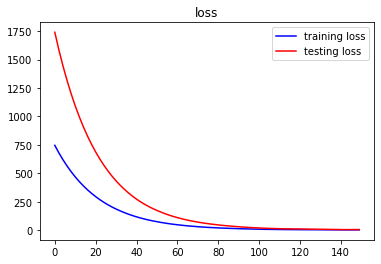

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(0, 150), cost_list, 'b', label = 'training loss')
plt.plot(range(0, 150), test_cost_list, 'r', label = 'testing loss')
plt.title('loss')
plt.legend()
plt.show()

### **2. Plot the accuracy curve**

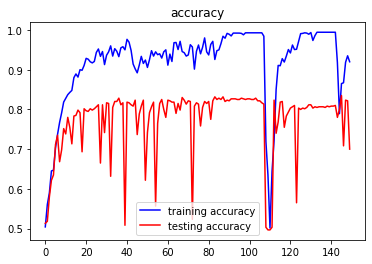

In [36]:
plt.plot(range(0, 150), accuracy_list, 'b', label = 'training accuracy')
plt.plot(range(0, 150), test_accuracy_list, 'r', label = 'testing accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

### **3. Plot the quantitative results**

**Training results**

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("⋅ confusion_matrix\n", confusion_matrix(y_train,y_pred_train))
print("⋅ classification_report : \n", classification_report(y_train,y_pred_train))
print("⋅ final training accuracy : ", accuracy_score(y_train, y_pred_train))

⋅ confusion_matrix
 [[696   2]
 [  1 701]]
⋅ classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       698
           1       1.00      1.00      1.00       702

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

⋅ final training accuracy :  0.9978571428571429


**Testing results**

In [0]:
print("⋅ confusion_matrix\n", confusion_matrix(y_test,y_pred_test))
print("⋅ classification_report : \n", classification_report(y_test,y_pred_test))
print("⋅ final testing accuracy : ", accuracy_score(y_test, y_pred_test))

⋅ confusion_matrix
 [[240  62]
 [ 56 242]]
⋅ classification_report : 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       302
           1       0.80      0.81      0.80       298

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600

⋅ final testing accuracy :  0.8033333333333333


# **4. Testing accuracy**

In [0]:
print("final testing accuracy : ",  accuracy_score(y_test, y_pred_test)* 100, "%")

final testing accuracy :  80.33333333333333 %
